# Import and read data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!pip install -q kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (3).json


{'kaggle.json': b'{"username":"rezaseidgar","key":"87df51df3f17e77c3e0b2e4a2b031614"}'}

In [4]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d matleonard/feature-engineering-data

feature-engineering-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
!ls

 baseline_data.pqt	        interactions.pqt   past_6hr_events.pqt
 catboost_encodings.pqt        'kaggle (1).json'   sample_data
 count_encodings.pqt	       'kaggle (2).json'   svd_encodings.pqt
 downloads.pqt		       'kaggle (3).json'   time_deltas.pqt
 feature-engineering-data.zip   kaggle.json	   train_sample.csv


In [8]:
!unzip '/content/feature-engineering-data.zip' -d '/content/'

Archive:  /content/feature-engineering-data.zip
replace /content/baseline_data.pqt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [9]:
data = pd.read_csv('/content/train_sample.csv')
data.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,89489,3,1,13,379,2017-11-06 15:13:23,NaN,0
1,204158,35,1,13,21,2017-11-06 15:41:07,2017-11-07 08:17:19,1
2,3437,6,1,13,459,2017-11-06 15:42:32,NaN,0
3,167543,3,1,13,379,2017-11-06 15:56:17,NaN,0
4,147509,3,1,13,379,2017-11-06 15:57:01,NaN,0


In [10]:
data = pd.concat([data,pd.read_parquet('/content/time_deltas.pqt')
                      ,pd.read_parquet('/content/past_6hr_events.pqt')
                      # ,pd.read_parquet('/content/interactions.pqt')
                      ,pd.read_parquet('/content/downloads.pqt')
                      ,pd.read_parquet('/content/count_encodings.pqt')
                      #,pd.read_parquet('/content/catboost_encodings.pqt')
                      ,pd.read_parquet('/content/baseline_data.pqt').drop(columns=['ip','app','device','os','channel','click_time','attributed_time','is_attributed'])], axis=1)
data.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,past_events,ip_past_6hr_counts,previous_downloads,ip_count,app_count,device_count,os_count,channel_count,day,hour,minute,second
0,89489,3,1,13,379,2017-11-06 15:13:23,NaN,0,1309.0,0.0,1.0,68.0,292254.0,1648091.0,370652.0,26760.0,6,15,13,23
1,204158,35,1,13,21,2017-11-06 15:41:07,2017-11-07 08:17:19,1,1309.0,0.0,1.0,4.0,60114.0,1648091.0,370652.0,41256.0,6,15,41,7
2,3437,6,1,13,459,2017-11-06 15:42:32,NaN,0,1309.0,0.0,1.0,118.0,19564.0,1648091.0,370652.0,31221.0,6,15,42,32
3,167543,3,1,13,379,2017-11-06 15:56:17,NaN,0,1309.0,0.0,1.0,29.0,292254.0,1648091.0,370652.0,26760.0,6,15,56,17
4,147509,3,1,13,379,2017-11-06 15:57:01,NaN,0,1309.0,0.0,1.0,31.0,292254.0,1648091.0,370652.0,26760.0,6,15,57,1


# Feature Engineering

In [11]:
data.drop(columns=['ip','app','device','os','channel'],inplace=True)
data.head()

,click_time,attributed_time,is_attributed,past_events,ip_past_6hr_counts,previous_downloads,ip_count,app_count,device_count,os_count,channel_count,day,hour,minute,second
0,2017-11-06 15:13:23,NaN,0,1309.0,0.0,1.0,68.0,292254.0,1648091.0,370652.0,26760.0,6,15,13,23
1,2017-11-06 15:41:07,2017-11-07 08:17:19,1,1309.0,0.0,1.0,4.0,60114.0,1648091.0,370652.0,41256.0,6,15,41,7
2,2017-11-06 15:42:32,NaN,0,1309.0,0.0,1.0,118.0,19564.0,1648091.0,370652.0,31221.0,6,15,42,32
3,2017-11-06 15:56:17,NaN,0,1309.0,0.0,1.0,29.0,292254.0,1648091.0,370652.0,26760.0,6,15,56,17
4,2017-11-06 15:57:01,NaN,0,1309.0,0.0,1.0,31.0,292254.0,1648091.0,370652.0,26760.0,6,15,57,1


In [12]:
data.drop(columns=['click_time','attributed_time','second'],inplace=True)
data.head()

,is_attributed,past_events,ip_past_6hr_counts,previous_downloads,ip_count,app_count,device_count,os_count,channel_count,day,hour,minute
0,0,1309.0,0.0,1.0,68.0,292254.0,1648091.0,370652.0,26760.0,6,15,13
1,1,1309.0,0.0,1.0,4.0,60114.0,1648091.0,370652.0,41256.0,6,15,41
2,0,1309.0,0.0,1.0,118.0,19564.0,1648091.0,370652.0,31221.0,6,15,42
3,0,1309.0,0.0,1.0,29.0,292254.0,1648091.0,370652.0,26760.0,6,15,56
4,0,1309.0,0.0,1.0,31.0,292254.0,1648091.0,370652.0,26760.0,6,15,57


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2300561 entries, 0 to 2300560
Data columns (total 12 columns):
 #   Column              Dtype  
---  ------              -----  
 0   is_attributed       int64  
 1   past_events         float64
 2   ip_past_6hr_counts  float64
 3   previous_downloads  float64
 4   ip_count            float64
 5   app_count           float64
 6   device_count        float64
 7   os_count            float64
 8   channel_count       float64
 9   day                 uint8  
 10  hour                uint8  
 11  minute              uint8  
dtypes: float64(8), int64(1), uint8(3)
memory usage: 164.5 MB


In [14]:
data['day'] = data['day'].astype('int64')
data['hour'] = data['hour'].astype('int64')
data['minute'] = data['minute'].astype('int64')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2300561 entries, 0 to 2300560
Data columns (total 12 columns):
 #   Column              Dtype  
---  ------              -----  
 0   is_attributed       int64  
 1   past_events         float64
 2   ip_past_6hr_counts  float64
 3   previous_downloads  float64
 4   ip_count            float64
 5   app_count           float64
 6   device_count        float64
 7   os_count            float64
 8   channel_count       float64
 9   day                 int64  
 10  hour                int64  
 11  minute              int64  
dtypes: float64(8), int64(4)
memory usage: 210.6 MB


In [16]:
# data['days_to_newyear'] = 62 - data['day']

In [17]:
data['hours'] = data['day']*24 + data['hour']
data.head()

,is_attributed,past_events,ip_past_6hr_counts,previous_downloads,ip_count,app_count,device_count,os_count,channel_count,day,hour,minute,hours
0,0,1309.0,0.0,1.0,68.0,292254.0,1648091.0,370652.0,26760.0,6,15,13,159
1,1,1309.0,0.0,1.0,4.0,60114.0,1648091.0,370652.0,41256.0,6,15,41,159
2,0,1309.0,0.0,1.0,118.0,19564.0,1648091.0,370652.0,31221.0,6,15,42,159
3,0,1309.0,0.0,1.0,29.0,292254.0,1648091.0,370652.0,26760.0,6,15,56,159
4,0,1309.0,0.0,1.0,31.0,292254.0,1648091.0,370652.0,26760.0,6,15,57,159


In [18]:
# arr = []
# for i in range(len(data)):
#   if data['hour'].values[i] < 5:
#     arr.append('mid_night')
#   elif data['hour'].values[i] < 12:
#     arr.append('morning')
#   elif data['hour'].values[i] < 17:
#     arr.append('afternoon')
#   elif data['hour'].values[i] < 21:
#     arr.append('evening')
#   else:
#     arr.append('night')
# data['day_parts'] = arr

In [19]:
arr = []
for i in range(len(data)):
  if data['hour'].values[i] < 5:
    arr.append(0)
  elif data['hour'].values[i] < 12:
    arr.append(1)
  elif data['hour'].values[i] < 17:
    arr.append(2)
  elif data['hour'].values[i] < 21:
    arr.append(3)
  else:
    arr.append(4)
data['day_parts'] = arr

In [20]:
data.head()

,is_attributed,past_events,ip_past_6hr_counts,previous_downloads,ip_count,app_count,device_count,os_count,channel_count,day,hour,minute,hours,day_parts
0,0,1309.0,0.0,1.0,68.0,292254.0,1648091.0,370652.0,26760.0,6,15,13,159,2
1,1,1309.0,0.0,1.0,4.0,60114.0,1648091.0,370652.0,41256.0,6,15,41,159,2
2,0,1309.0,0.0,1.0,118.0,19564.0,1648091.0,370652.0,31221.0,6,15,42,159,2
3,0,1309.0,0.0,1.0,29.0,292254.0,1648091.0,370652.0,26760.0,6,15,56,159,2
4,0,1309.0,0.0,1.0,31.0,292254.0,1648091.0,370652.0,26760.0,6,15,57,159,2


In [21]:
# data = pd.concat([data,pd.get_dummies(data['day_parts'])],axis=1)
# data.drop(columns='day_parts',inplace=True)
# data.head()

In [22]:
data['ip*app'] = data['ip_count'] * data['app_count']

In [23]:
data['ip*device'] = data['ip_count'] * data['device_count']

In [24]:
data['ip*os'] = data['ip_count'] * data['os_count']

In [25]:
data['ip*downloads'] = data['ip_count'] * data['previous_downloads']

# Creating the Feature Set and Target Label variables

In [26]:
X = data.drop(columns=['is_attributed'])
y = data['is_attributed']

In [27]:
X.head()

,past_events,ip_past_6hr_counts,previous_downloads,ip_count,app_count,device_count,os_count,channel_count,day,hour,minute,hours,day_parts,ip*app,ip*device,ip*os,ip*downloads
0,1309.0,0.0,1.0,68.0,292254.0,1648091.0,370652.0,26760.0,6,15,13,159,2,19873272.0,112070188.0,25204336.0,68.0
1,1309.0,0.0,1.0,4.0,60114.0,1648091.0,370652.0,41256.0,6,15,41,159,2,240456.0,6592364.0,1482608.0,4.0
2,1309.0,0.0,1.0,118.0,19564.0,1648091.0,370652.0,31221.0,6,15,42,159,2,2308552.0,194474738.0,43736936.0,118.0
3,1309.0,0.0,1.0,29.0,292254.0,1648091.0,370652.0,26760.0,6,15,56,159,2,8475366.0,47794639.0,10748908.0,29.0
4,1309.0,0.0,1.0,31.0,292254.0,1648091.0,370652.0,26760.0,6,15,57,159,2,9059874.0,51090821.0,11490212.0,31.0


In [28]:
y.head()

0    0
1    1
2    0
3    0
4    0
Name: is_attributed, dtype: int64

# Balance Data

In [29]:
from imblearn.under_sampling import RandomUnderSampler
import collections
sampler = RandomUnderSampler()
X_resampled, y_resampled = sampler.fit_resample(X,y)
print(sorted(collections.Counter(y_resampled).items()))

[(0, 456846), (1, 456846)]


# 80-20 splitting the dataset into Training Set and Test Set

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [31]:
from sklearn.model_selection import train_test_split
X_train_notb, X_test_notb, y_train_notb, y_test_notb = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling of the features in the Training and Test Set

In [32]:
for col in X_train.columns:
    X_train[col] = np.sqrt(X_train[col])
    X_train_notb[col] = np.sqrt(X_train_notb[col])

In [33]:
for col in X_test.columns:
    X_test[col] = np.sqrt(X_test[col])
    X_test_notb[col] = np.sqrt(X_test_notb[col])

In [34]:
from sklearn.preprocessing import StandardScaler
columns = X_train.columns
scalerx = StandardScaler()
X_train_scaled = scalerx.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns = columns)

X_train_scaled_notb = scalerx.fit_transform(X_train_notb)
X_train_scaled_notb = pd.DataFrame(X_train_scaled_notb, columns = columns)

X_test_scaled = scalerx.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = columns)

X_test_scaled_notb = scalerx.transform(X_test_notb)
X_test_scaled_notb = pd.DataFrame(X_test_scaled_notb, columns = columns)

In [35]:
X_train_scaled.head()

,past_events,ip_past_6hr_counts,previous_downloads,ip_count,app_count,device_count,os_count,channel_count,day,hour,minute,hours,day_parts,ip*app,ip*device,ip*os,ip*downloads
0,-0.264593,-0.592511,-0.337939,-0.564287,0.198209,-1.843242,-0.675656,1.480840,0.171488,0.606664,-1.500006,0.321087,0.807078,-0.499944,-0.587287,-0.496623,-0.192691
1,-0.264593,-0.592511,-0.337939,-0.564287,0.198209,-2.479795,-0.675656,1.480840,0.171488,0.727413,-0.635818,0.368923,0.807078,-0.499944,-0.603135,-0.496623,-0.192691
2,-0.264593,-0.592511,-0.337939,-0.631555,-0.753874,0.485293,-0.373994,-0.992653,1.254511,0.210482,-0.148613,1.302254,0.153574,-0.560991,-0.604039,-0.525827,-0.195099
3,-0.754473,-0.090523,0.221411,0.030967,1.729960,0.485293,1.317872,1.964614,1.254511,-1.143232,-0.204266,0.980494,-1.424125,0.443519,0.131926,0.431553,-0.112920
4,-0.264593,-0.592511,-0.337939,-0.631555,-0.073453,0.485293,1.317872,-1.130246,1.254511,-0.091924,0.442807,1.210840,0.153574,-0.560991,-0.604039,-0.525827,-0.195099


In [36]:
X_test_scaled.head()

,past_events,ip_past_6hr_counts,previous_downloads,ip_count,app_count,device_count,os_count,channel_count,day,hour,minute,hours,day_parts,ip*app,ip*device,ip*os,ip*downloads
0,-0.651832,-0.494259,0.089881,-0.088709,-1.098491,0.350265,1.211449,-0.859992,0.176077,1.606381,1.162411,0.788815,1.697403,-0.354615,-0.021649,0.287451,-0.143317
1,-0.956031,2.310947,0.549727,0.399763,0.211617,-2.719866,-0.387225,-1.042650,1.252656,0.917382,0.487484,1.567669,0.775805,0.413878,-0.462079,0.099153,-0.004531
2,-0.714462,0.674399,1.226713,0.611486,0.186557,0.350265,1.211449,0.152849,0.176077,0.691969,-0.439068,0.363933,0.775805,0.602067,0.731305,1.265032,0.182426
3,-0.563370,-0.161226,-0.377104,0.032676,-2.281152,0.350265,-0.808235,-1.925989,-0.970169,-2.347084,1.373853,-1.489561,-1.449128,-0.628433,0.108883,-0.280348,-0.186960
4,-1.020476,5.160668,3.178662,4.693056,0.289929,-2.719866,1.211449,1.205072,-0.970169,0.806690,0.658603,-0.766311,0.775805,4.639120,0.433964,6.963536,3.132461


# Logistic Regression

Performance Analysis of the **`Logistic Regression`** Model in terms of Accuracy, Precision, Recall and F1-Score with Confusion Matrix

In [37]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X_train_scaled, y_train)

In [38]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_prediction = model.predict(X_test_scaled)
print(confusion_matrix(y_test, y_prediction))
print(classification_report(y_test, y_prediction))

[[62124 28967]
 [10471 81177]]
              precision    recall  f1-score   support

           0       0.86      0.68      0.76     91091
           1       0.74      0.89      0.80     91648

    accuracy                           0.78    182739
   macro avg       0.80      0.78      0.78    182739
weighted avg       0.80      0.78      0.78    182739



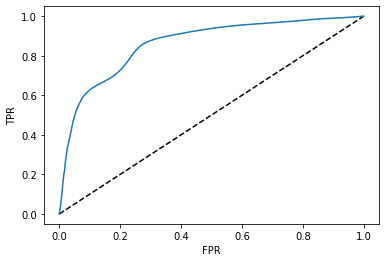

In [39]:
from sklearn.metrics import roc_curve
y_pred_prob = model.predict_proba(X_test_scaled)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [40]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_prob)

0.8604097295563498

feature importance **`Logistic Regression`** and re_training on them

Feature: 0, Score: -0.13898
Feature: 1, Score: -0.66903
Feature: 2, Score: 0.65001
Feature: 3, Score: -0.81108
Feature: 4, Score: -1.11023
Feature: 5, Score: -0.93432
Feature: 6, Score: -0.05596
Feature: 7, Score: 0.27309
Feature: 8, Score: 1.13862
Feature: 9, Score: 0.17504
Feature: 10, Score: -0.00389
Feature: 11, Score: -1.24625
Feature: 12, Score: -0.02536
Feature: 13, Score: -0.24867
Feature: 14, Score: -0.12049
Feature: 15, Score: 0.21031
Feature: 16, Score: 0.55995


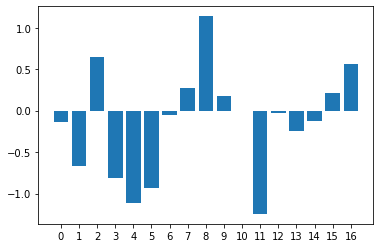

In [41]:
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.xticks([x for x in range(len(importance))])
plt.show()

In [373]:
model = LogisticRegression().fit(X_train_scaled.iloc[:,[4,11]], y_train)

In [374]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_prediction = model.predict(X_test_scaled.iloc[:,[4,11]])
print(confusion_matrix(y_test, y_prediction))
print(classification_report(y_test, y_prediction))

[[63096 27995]
 [ 9765 81883]]
              precision    recall  f1-score   support

           0       0.87      0.69      0.77     91091
           1       0.75      0.89      0.81     91648

    accuracy                           0.79    182739
   macro avg       0.81      0.79      0.79    182739
weighted avg       0.81      0.79      0.79    182739



Plotting the Decision Boundary given by the Trained **`Logistic Regression`**

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


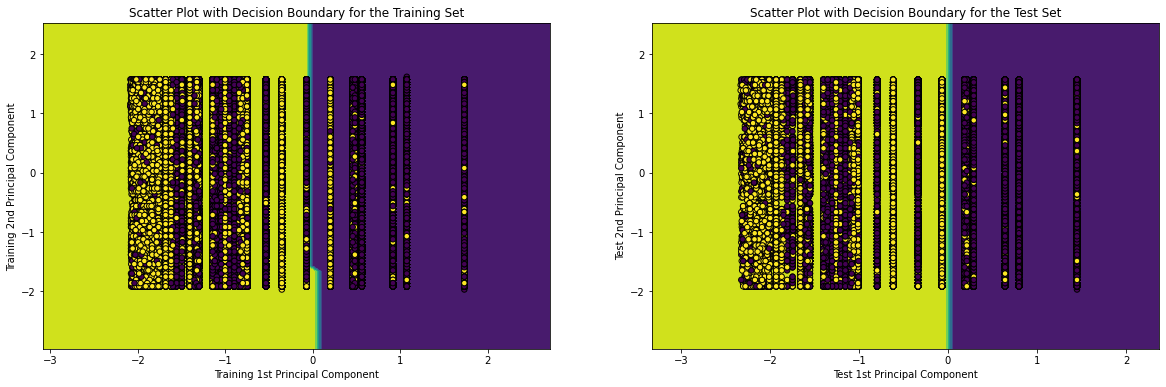

In [375]:
x_min, x_max = X_train_scaled.iloc[:, 4].min() - 1, X_train_scaled.iloc[:, 4].max() + 1
y_min, y_max = X_train_scaled.iloc[:, 11].min() - 1, X_train_scaled.iloc[:, 11].max() + 1

xx_train, yy_train = np.meshgrid(np.arange(x_min, x_max, 0.1),
                                 np.arange(y_min, y_max, 0.1))

Z_train = model.predict(np.c_[xx_train.ravel(), yy_train.ravel()])
Z_train = Z_train.reshape(xx_train.shape)


x_min, x_max = X_test_scaled.iloc[:, 4].min() - 1, X_test_scaled.iloc[:, 4].max() + 1
y_min, y_max = X_test_scaled.iloc[:, 11].min() - 1, X_test_scaled.iloc[:, 11].max() + 1

xx_test, yy_test = np.meshgrid(np.arange(x_min, x_max, 0.1),
                               np.arange(y_min, y_max, 0.1))

Z_test = model.predict(np.c_[xx_test.ravel(), yy_test.ravel()])
Z_test = Z_test.reshape(xx_test.shape)



plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.contourf(xx_train, yy_train, Z_train)
plt.scatter(X_train_scaled.iloc[:, 4], X_train_scaled.iloc[:, 11], c = y_train, s = 30, edgecolor = 'k')
plt.xlabel('Training 1st Principal Component')
plt.ylabel('Training 2nd Principal Component')
plt.title('Scatter Plot with Decision Boundary for the Training Set')
plt.subplot(1, 2, 2)
plt.contourf(xx_test, yy_test, Z_test)
plt.scatter(X_test_scaled.iloc[:, 4], X_test_scaled.iloc[:, 11], c = y_test, s = 30, edgecolor = 'k')
plt.xlabel('Test 1st Principal Component')
plt.ylabel('Test 2nd Principal Component')
plt.title('Scatter Plot with Decision Boundary for the Test Set')
plt.show()

**`Logistic Regression`** with Class Weight

In [43]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced').fit(X_train_scaled_notb, y_train_notb)

In [44]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_prediction = model.predict(X_test_scaled_notb)
print(confusion_matrix(y_test_notb, y_prediction))
print(classification_report(y_test_notb, y_prediction))

[[283213  85318]
 [ 18304  73278]]
              precision    recall  f1-score   support

           0       0.94      0.77      0.85    368531
           1       0.46      0.80      0.59     91582

    accuracy                           0.77    460113
   macro avg       0.70      0.78      0.72    460113
weighted avg       0.84      0.77      0.79    460113



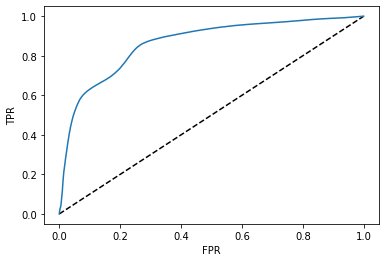

In [45]:
from sklearn.metrics import roc_curve
y_pred_prob = model.predict_proba(X_test_scaled_notb)[:,1]
fpr, tpr, threshold = roc_curve(y_test_notb, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [46]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test_notb, y_pred_prob)

0.8631245358036418

# SVM

Performance Analysis of the **`SVM`** Model in terms of Accuracy, Precision, Recall and F1-Score with Confusion Matrix


In [47]:
from sklearn import svm
model = svm.SVC()
model.fit(X_train_scaled.sample(10000,random_state=42),y_train.iloc[X_train_scaled.sample(10000,random_state=42).index])

SVC()

In [48]:
y_prediction = model.predict(X_test_scaled)
print(confusion_matrix(y_test, y_prediction))
print(classification_report(y_test, y_prediction))

[[67712 23379]
 [12307 79341]]
              precision    recall  f1-score   support

           0       0.85      0.74      0.79     91091
           1       0.77      0.87      0.82     91648

    accuracy                           0.80    182739
   macro avg       0.81      0.80      0.80    182739
weighted avg       0.81      0.80      0.80    182739



In [49]:
# from sklearn.metrics import roc_curve
# y_pred_prob = model.predict_proba(X_test_scaled)[:,1]
# fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
# plt.plot([0, 1], [0, 1], 'k--')
# plt.plot(fpr,tpr)
# plt.xlabel('FPR')
# plt.ylabel('TPR')
# plt.show()

In [50]:
# from sklearn.metrics import roc_auc_score
# roc_auc_score(y_test, y_pred_prob)

feature importance **`SVM`** and re_training on them

In [51]:
model = svm.SVC()
model.fit(X_train_scaled.iloc[:,[4,11]].sample(10000,random_state=42),y_train.iloc[X_train_scaled.sample(10000,random_state=42).index])

SVC()

In [52]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_prediction = model.predict(X_test_scaled.iloc[:,[4,11]])
print(confusion_matrix(y_test, y_prediction))
print(classification_report(y_test, y_prediction))

[[39293 51798]
 [ 3755 87893]]
              precision    recall  f1-score   support

           0       0.91      0.43      0.59     91091
           1       0.63      0.96      0.76     91648

    accuracy                           0.70    182739
   macro avg       0.77      0.70      0.67    182739
weighted avg       0.77      0.70      0.67    182739



Plotting the Decision Boundary given by the Trained **`SVM`**

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


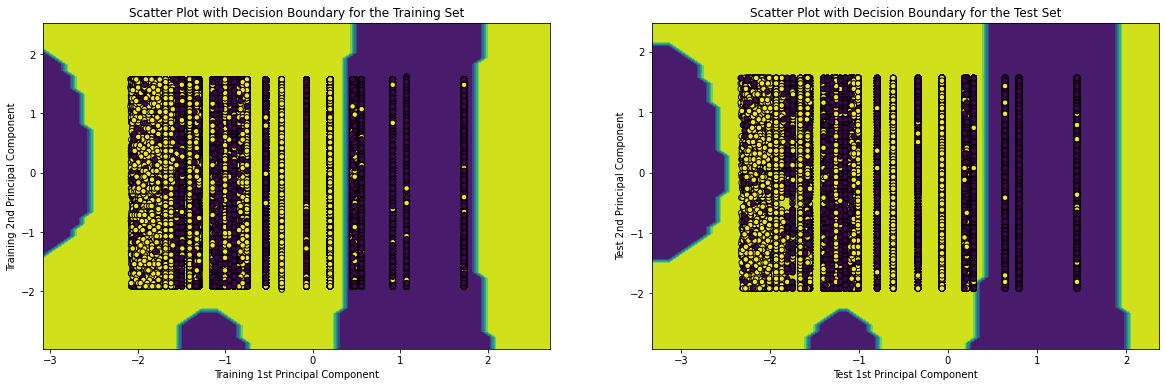

In [53]:
x_min, x_max = X_train_scaled.iloc[:, 4].min() - 1, X_train_scaled.iloc[:, 4].max() + 1
y_min, y_max = X_train_scaled.iloc[:, 11].min() - 1, X_train_scaled.iloc[:, 11].max() + 1

xx_train, yy_train = np.meshgrid(np.arange(x_min, x_max, 0.1),
                                 np.arange(y_min, y_max, 0.1))

Z_train = model.predict(np.c_[xx_train.ravel(), yy_train.ravel()])
Z_train = Z_train.reshape(xx_train.shape)


x_min, x_max = X_test_scaled.iloc[:, 4].min() - 1, X_test_scaled.iloc[:, 4].max() + 1
y_min, y_max = X_test_scaled.iloc[:, 11].min() - 1, X_test_scaled.iloc[:, 11].max() + 1

xx_test, yy_test = np.meshgrid(np.arange(x_min, x_max, 0.1),
                               np.arange(y_min, y_max, 0.1))

Z_test = model.predict(np.c_[xx_test.ravel(), yy_test.ravel()])
Z_test = Z_test.reshape(xx_test.shape)



plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.contourf(xx_train, yy_train, Z_train)
plt.scatter(X_train_scaled.iloc[:, 4], X_train_scaled.iloc[:, 11], c = y_train, s = 30, edgecolor = 'k')
plt.xlabel('Training 1st Principal Component')
plt.ylabel('Training 2nd Principal Component')
plt.title('Scatter Plot with Decision Boundary for the Training Set')
plt.subplot(1, 2, 2)
plt.contourf(xx_test, yy_test, Z_test)
plt.scatter(X_test_scaled.iloc[:, 4], X_test_scaled.iloc[:, 11], c = y_test, s = 30, edgecolor = 'k')
plt.xlabel('Test 1st Principal Component')
plt.ylabel('Test 2nd Principal Component')
plt.title('Scatter Plot with Decision Boundary for the Test Set')
plt.show()

# KNN

Performance Analysis of the **`KNN`** Model in terms of Accuracy, Precision, Recall and F1-Score with Confusion Matrix

In [54]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [55]:
y_prediction = model.predict(X_test_scaled.sample(10000,random_state=42))
print(confusion_matrix(y_test.iloc[X_test_scaled.sample(10000,random_state=42).index], y_prediction))
print(classification_report(y_test.iloc[X_test_scaled.sample(10000,random_state=42).index], y_prediction))

[[4248  732]
 [ 734 4286]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      4980
           1       0.85      0.85      0.85      5020

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [309]:
# from sklearn.metrics import roc_curve
# y_pred_prob = model.predict_proba((X_test_scaled.sample(10000,random_state=42))[:,1]
# fpr , tpr , threshold = roc_curve(y_test, y_pred_prob)
# plt.plot([0, 1], [0, 1], 'k--')
# plt.plot(fpr,tpr)
# plt.xlabel('FPR')
# plt.ylabel('TPR')
# plt.show()

In [310]:
# from sklearn.metrics import roc_auc_score
# roc_auc_score(y_test, y_pred_prob)

feature importance **`KNN`** and re_training on them

In [311]:
# results = permutation_importance(model,X_train_scaled.sample(10000,random_state=42), y_train.iloc[X_train_scaled.sample(10000,random_state=42).index], scoring='accuracy')

# importance = results.importances_mean

# for i,v in enumerate(importance):
# 	print('Feature: %0d, Score: %.5f' % (i,v))

# pyplot.bar([x for x in range(len(importance))], importance)
# pyplot.show()

In [67]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_scaled.iloc[:,[4,5]],y_train)

KNeighborsClassifier()

In [68]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_prediction = model.predict(X_test_scaled.iloc[:,[4,5]])
print(confusion_matrix(y_test, y_prediction))
print(classification_report(y_test, y_prediction))

[[71186 19905]
 [55856 35792]]
              precision    recall  f1-score   support

           0       0.56      0.78      0.65     91091
           1       0.64      0.39      0.49     91648

    accuracy                           0.59    182739
   macro avg       0.60      0.59      0.57    182739
weighted avg       0.60      0.59      0.57    182739



Plotting the Decision Boundary given by the Trained **`KNN`**

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


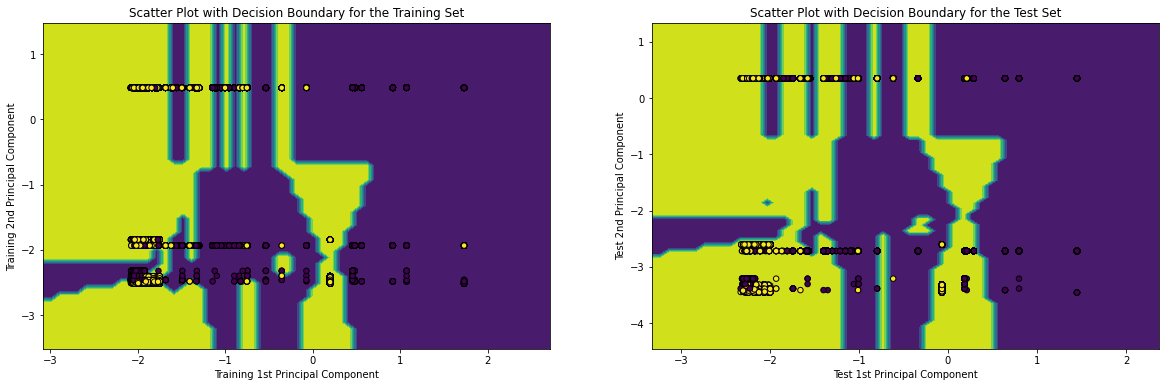

In [69]:
x_min, x_max = X_train_scaled.iloc[:, 4].min() - 1, X_train_scaled.iloc[:, 4].max() + 1
y_min, y_max = X_train_scaled.iloc[:, 5].min() - 1, X_train_scaled.iloc[:, 5].max() + 1

xx_train, yy_train = np.meshgrid(np.arange(x_min, x_max, 0.1),
                                 np.arange(y_min, y_max, 0.1))

Z_train = model.predict(np.c_[xx_train.ravel(), yy_train.ravel()])
Z_train = Z_train.reshape(xx_train.shape)


x_min, x_max = X_test_scaled.iloc[:, 4].min() - 1, X_test_scaled.iloc[:, 4].max() + 1
y_min, y_max = X_test_scaled.iloc[:, 5].min() - 1, X_test_scaled.iloc[:, 5].max() + 1

xx_test, yy_test = np.meshgrid(np.arange(x_min, x_max, 0.1),
                               np.arange(y_min, y_max, 0.1))

Z_test = model.predict(np.c_[xx_test.ravel(), yy_test.ravel()])
Z_test = Z_test.reshape(xx_test.shape)



plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.contourf(xx_train, yy_train, Z_train)
plt.scatter(X_train_scaled.iloc[:, 4], X_train_scaled.iloc[:, 5], c = y_train, s = 30, edgecolor = 'k')
plt.xlabel('Training 1st Principal Component')
plt.ylabel('Training 2nd Principal Component')
plt.title('Scatter Plot with Decision Boundary for the Training Set')
plt.subplot(1, 2, 2)
plt.contourf(xx_test, yy_test, Z_test)
plt.scatter(X_test_scaled.iloc[:, 4], X_test_scaled.iloc[:, 5], c = y_test, s = 30, edgecolor = 'k')
plt.xlabel('Test 1st Principal Component')
plt.ylabel('Test 2nd Principal Component')
plt.title('Scatter Plot with Decision Boundary for the Test Set')
plt.show()

# Decision Tree

Performance Analysis of the **`Decision Tree`** Model in terms of Accuracy, Precision, Recall and F1-Score with Confusion Matrix

In [80]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [81]:
y_prediction = model.predict(X_test_scaled)
print(confusion_matrix(y_test, y_prediction))
print(classification_report(y_test, y_prediction))

[[56175 34916]
 [38748 52900]]
              precision    recall  f1-score   support

           0       0.59      0.62      0.60     91091
           1       0.60      0.58      0.59     91648

    accuracy                           0.60    182739
   macro avg       0.60      0.60      0.60    182739
weighted avg       0.60      0.60      0.60    182739



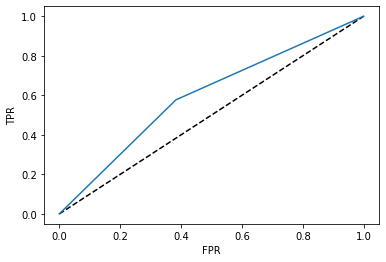

In [82]:
from sklearn.metrics import roc_curve
y_pred_prob = model.predict_proba(X_test_scaled)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [83]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_prob)

0.5969551774566254

feature importance **`Decision Tree`** and re_training on them

Feature: 0, Score: 0.03969
Feature: 1, Score: 0.01957
Feature: 2, Score: 0.01220
Feature: 3, Score: 0.01209
Feature: 4, Score: 0.57319
Feature: 5, Score: 0.00247
Feature: 6, Score: 0.01838
Feature: 7, Score: 0.05344
Feature: 8, Score: 0.00217
Feature: 9, Score: 0.01549
Feature: 10, Score: 0.03028
Feature: 11, Score: 0.01832
Feature: 12, Score: 0.00252
Feature: 13, Score: 0.04021
Feature: 14, Score: 0.11219
Feature: 15, Score: 0.02923
Feature: 16, Score: 0.01858


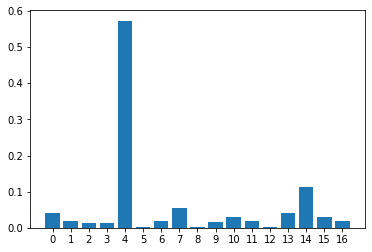

In [84]:
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.xticks([x for x in range(len(importance))])
plt.show()

In [85]:
model = tree.DecisionTreeClassifier()
model.fit(X_train_scaled.iloc[:,[14,4]], y_train)

DecisionTreeClassifier()

In [86]:
y_prediction = model.predict(X_test_scaled.iloc[:,[14,4]])
print(confusion_matrix(y_test, y_prediction))
print(classification_report(y_test, y_prediction))

[[53558 37533]
 [60413 31235]]
              precision    recall  f1-score   support

           0       0.47      0.59      0.52     91091
           1       0.45      0.34      0.39     91648

    accuracy                           0.46    182739
   macro avg       0.46      0.46      0.46    182739
weighted avg       0.46      0.46      0.46    182739



Plotting the Decision Boundary given by the Trained **`Decision Tree`**

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


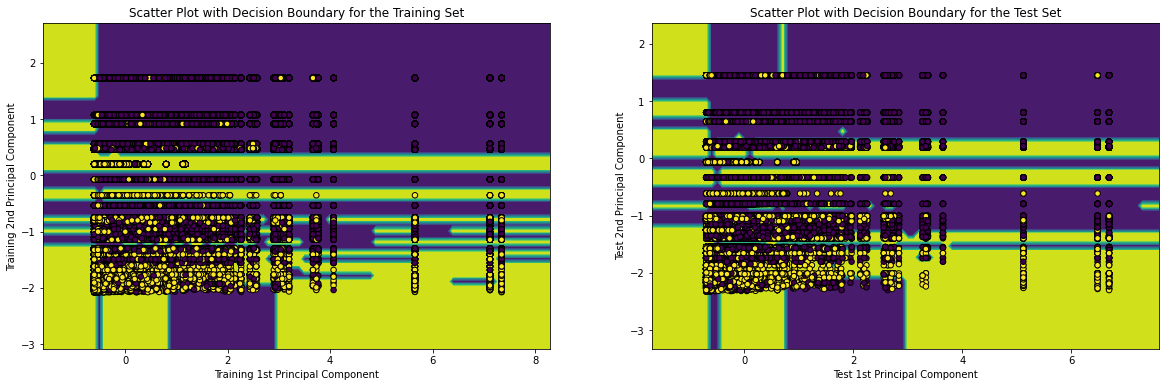

In [87]:
x_min, x_max = X_train_scaled.iloc[:, 14].min() - 1, X_train_scaled.iloc[:, 14].max() + 1
y_min, y_max = X_train_scaled.iloc[:, 4].min() - 1, X_train_scaled.iloc[:, 4].max() + 1

xx_train, yy_train = np.meshgrid(np.arange(x_min, x_max, 0.1),
                                 np.arange(y_min, y_max, 0.1))

Z_train = model.predict(np.c_[xx_train.ravel(), yy_train.ravel()])
Z_train = Z_train.reshape(xx_train.shape)


x_min, x_max = X_test_scaled.iloc[:, 14].min() - 1, X_test_scaled.iloc[:, 14].max() + 1
y_min, y_max = X_test_scaled.iloc[:, 4].min() - 1, X_test_scaled.iloc[:, 4].max() + 1

xx_test, yy_test = np.meshgrid(np.arange(x_min, x_max, 0.1),
                               np.arange(y_min, y_max, 0.1))

Z_test = model.predict(np.c_[xx_test.ravel(), yy_test.ravel()])
Z_test = Z_test.reshape(xx_test.shape)



plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.contourf(xx_train, yy_train, Z_train)
plt.scatter(X_train_scaled.iloc[:, 14], X_train_scaled.iloc[:, 4], c = y_train, s = 30, edgecolor = 'k')
plt.xlabel('Training 1st Principal Component')
plt.ylabel('Training 2nd Principal Component')
plt.title('Scatter Plot with Decision Boundary for the Training Set')
plt.subplot(1, 2, 2)
plt.contourf(xx_test, yy_test, Z_test)
plt.scatter(X_test_scaled.iloc[:, 14], X_test_scaled.iloc[:, 4], c = y_test, s = 30, edgecolor = 'k')
plt.xlabel('Test 1st Principal Component')
plt.ylabel('Test 2nd Principal Component')
plt.title('Scatter Plot with Decision Boundary for the Test Set')
plt.show()

# Random Forest

Performance Analysis of the **`Random Forest`** Model in terms of Accuracy, Precision, Recall and F1-Score with Confusion Matrix

In [89]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=3, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=3, random_state=42)

In [90]:
y_prediction = model.predict(X_test_scaled)
print(confusion_matrix(y_test, y_prediction))
print(classification_report(y_test, y_prediction))

[[68139 22952]
 [21186 70462]]
              precision    recall  f1-score   support

           0       0.76      0.75      0.76     91091
           1       0.75      0.77      0.76     91648

    accuracy                           0.76    182739
   macro avg       0.76      0.76      0.76    182739
weighted avg       0.76      0.76      0.76    182739



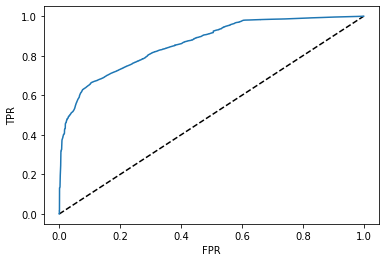

In [91]:
from sklearn.metrics import roc_curve
y_pred_prob = model.predict_proba(X_test_scaled)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [92]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_prob)

0.862071786113581

feature importance **`Random Forest`** and re_training on them

Feature: 0, Score: 0.00492
Feature: 1, Score: 0.05354
Feature: 2, Score: 0.01623
Feature: 3, Score: 0.11627
Feature: 4, Score: 0.32581
Feature: 5, Score: 0.03815
Feature: 6, Score: 0.01366
Feature: 7, Score: 0.01790
Feature: 8, Score: 0.00003
Feature: 9, Score: 0.00172
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00004
Feature: 12, Score: 0.00109
Feature: 13, Score: 0.14358
Feature: 14, Score: 0.15195
Feature: 15, Score: 0.07230
Feature: 16, Score: 0.04283


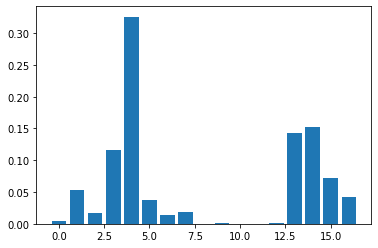

In [93]:
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [94]:
model = RandomForestClassifier(max_depth=3, random_state=42)
model.fit(X_train_scaled.iloc[:,[4,14]], y_train)

RandomForestClassifier(max_depth=3, random_state=42)

In [95]:
y_prediction = model.predict(X_test_scaled.iloc[:,[4,14]])
print(confusion_matrix(y_test, y_prediction))
print(classification_report(y_test, y_prediction))

[[36148 54943]
 [ 3017 88631]]
              precision    recall  f1-score   support

           0       0.92      0.40      0.56     91091
           1       0.62      0.97      0.75     91648

    accuracy                           0.68    182739
   macro avg       0.77      0.68      0.65    182739
weighted avg       0.77      0.68      0.65    182739



Plotting the Decision Boundary given by the Trained **`Random Forest`**

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


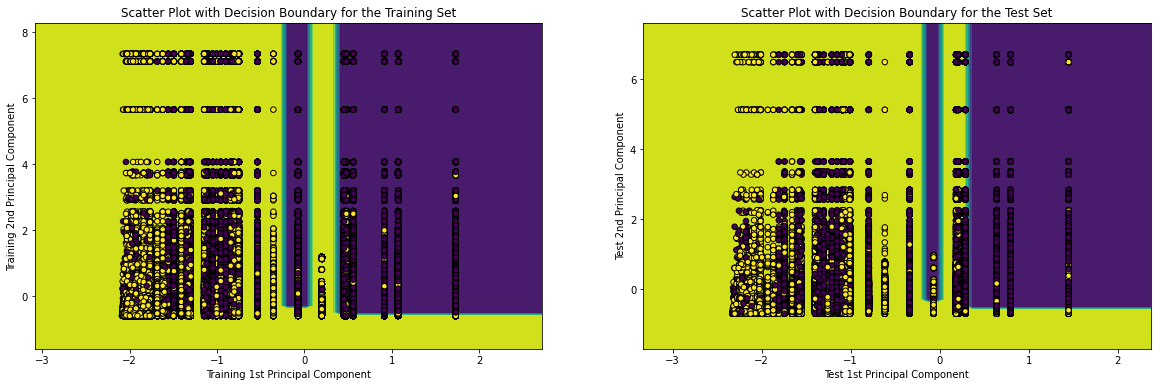

In [96]:
x_min, x_max = X_train_scaled.iloc[:, 4].min() - 1, X_train_scaled.iloc[:, 4].max() + 1
y_min, y_max = X_train_scaled.iloc[:, 14].min() - 1, X_train_scaled.iloc[:, 14].max() + 1

xx_train, yy_train = np.meshgrid(np.arange(x_min, x_max, 0.1),
                                 np.arange(y_min, y_max, 0.1))

Z_train = model.predict(np.c_[xx_train.ravel(), yy_train.ravel()])
Z_train = Z_train.reshape(xx_train.shape)


x_min, x_max = X_test_scaled.iloc[:, 4].min() - 1, X_test_scaled.iloc[:, 4].max() + 1
y_min, y_max = X_test_scaled.iloc[:, 14].min() - 1, X_test_scaled.iloc[:, 14].max() + 1

xx_test, yy_test = np.meshgrid(np.arange(x_min, x_max, 0.1),
                               np.arange(y_min, y_max, 0.1))

Z_test = model.predict(np.c_[xx_test.ravel(), yy_test.ravel()])
Z_test = Z_test.reshape(xx_test.shape)



plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.contourf(xx_train, yy_train, Z_train)
plt.scatter(X_train_scaled.iloc[:, 4], X_train_scaled.iloc[:, 14], c = y_train, s = 30, edgecolor = 'k')
plt.xlabel('Training 1st Principal Component')
plt.ylabel('Training 2nd Principal Component')
plt.title('Scatter Plot with Decision Boundary for the Training Set')
plt.subplot(1, 2, 2)
plt.contourf(xx_test, yy_test, Z_test)
plt.scatter(X_test_scaled.iloc[:, 4], X_test_scaled.iloc[:, 14], c = y_test, s = 30, edgecolor = 'k')
plt.xlabel('Test 1st Principal Component')
plt.ylabel('Test 2nd Principal Component')
plt.title('Scatter Plot with Decision Boundary for the Test Set')
plt.show()

# Naive Bayes


Performance Analysis of the **`Naive Bayes`** Model in terms of Accuracy, Precision, Recall and F1-Score with Confusion Matrix

In [97]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train_scaled, y_train)

GaussianNB()

In [98]:
y_prediction = model.predict(X_test_scaled)
print(confusion_matrix(y_test, y_prediction))
print(classification_report(y_test, y_prediction))

[[30784 60307]
 [ 6098 85550]]
              precision    recall  f1-score   support

           0       0.83      0.34      0.48     91091
           1       0.59      0.93      0.72     91648

    accuracy                           0.64    182739
   macro avg       0.71      0.64      0.60    182739
weighted avg       0.71      0.64      0.60    182739



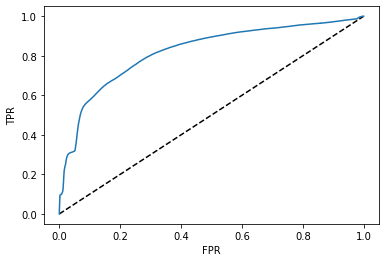

In [99]:
from sklearn.metrics import roc_curve
y_pred_prob = model.predict_proba(X_test_scaled)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [100]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_prob)

0.8212969724262094

feature importance **`Naive Bayes`** and re_training on them

In [101]:
from sklearn.inspection import permutation_importance

imps = permutation_importance(model, X_test_scaled, y_test)
importances = imps.importances_mean
std = imps.importances_std
indices = np.argsort(importances)[::-1]
features = X_test_scaled.columns

# Print the feature ranking
print("Feature ranking:")
for f in range(X_test.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))

Feature ranking:
1. app_count (0.060775)
2. device_count (0.020103)
3. ip*app (0.007847)
4. os_count (0.006292)
5. ip*device (0.001407)
6. past_events (0.000613)
7. day_parts (0.000187)
8. hours (0.000069)
9. hour (0.000065)
10. minute (0.000055)
11. day (-0.000042)
12. ip*downloads (-0.000566)
13. ip*os (-0.000783)
14. ip_past_6hr_counts (-0.000890)
15. ip_count (-0.001943)
16. previous_downloads (-0.002581)
17. channel_count (-0.005879)


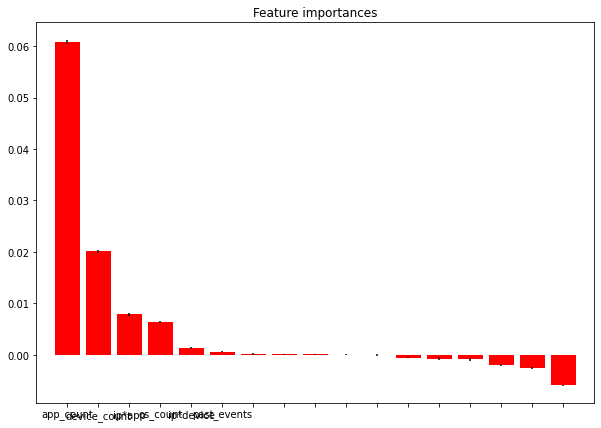

In [102]:
plt.figure(figsize=(10, 7))
plt.title("Feature importances")
plt.bar(range(X_test.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X_test.shape[1]), [features[indices[i]] for i in range(6)])
plt.xlim([-1, X_test.shape[1]])
plt.show()

In [103]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train_scaled.iloc[:,[4,5]], y_train)

GaussianNB()

In [104]:
y_prediction = model.predict(X_test_scaled.iloc[:,[4,5]])
print(confusion_matrix(y_test, y_prediction))
print(classification_report(y_test, y_prediction))

[[67555 23536]
 [23363 68285]]
              precision    recall  f1-score   support

           0       0.74      0.74      0.74     91091
           1       0.74      0.75      0.74     91648

    accuracy                           0.74    182739
   macro avg       0.74      0.74      0.74    182739
weighted avg       0.74      0.74      0.74    182739



Plotting the Decision Boundary given by the Trained **`Naive Bayes`**

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"


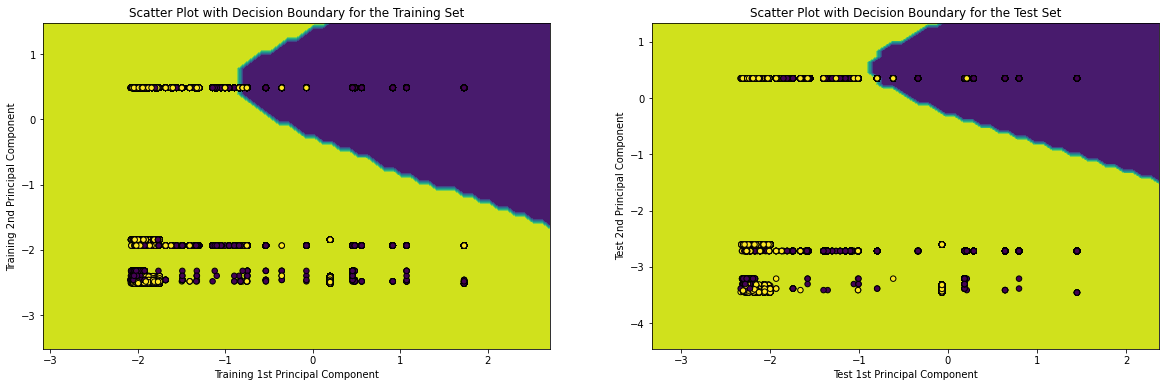

In [105]:
x_min, x_max = X_train_scaled.iloc[:, 4].min() - 1, X_train_scaled.iloc[:, 4].max() + 1
y_min, y_max = X_train_scaled.iloc[:, 5].min() - 1, X_train_scaled.iloc[:, 5].max() + 1

xx_train, yy_train = np.meshgrid(np.arange(x_min, x_max, 0.1),
                                 np.arange(y_min, y_max, 0.1))

Z_train = model.predict(np.c_[xx_train.ravel(), yy_train.ravel()])
Z_train = Z_train.reshape(xx_train.shape)


x_min, x_max = X_test_scaled.iloc[:, 4].min() - 1, X_test_scaled.iloc[:, 4].max() + 1
y_min, y_max = X_test_scaled.iloc[:, 5].min() - 1, X_test_scaled.iloc[:, 5].max() + 1

xx_test, yy_test = np.meshgrid(np.arange(x_min, x_max, 0.1),
                               np.arange(y_min, y_max, 0.1))

Z_test = model.predict(np.c_[xx_test.ravel(), yy_test.ravel()])
Z_test = Z_test.reshape(xx_test.shape)



plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.contourf(xx_train, yy_train, Z_train)
plt.scatter(X_train_scaled.iloc[:, 4], X_train_scaled.iloc[:, 5], c = y_train, s = 30, edgecolor = 'k')
plt.xlabel('Training 1st Principal Component')
plt.ylabel('Training 2nd Principal Component')
plt.title('Scatter Plot with Decision Boundary for the Training Set')
plt.subplot(1, 2, 2)
plt.contourf(xx_test, yy_test, Z_test)
plt.scatter(X_test_scaled.iloc[:, 4], X_test_scaled.iloc[:, 5], c = y_test, s = 30, edgecolor = 'k')
plt.xlabel('Test 1st Principal Component')
plt.ylabel('Test 2nd Principal Component')
plt.title('Scatter Plot with Decision Boundary for the Test Set')
plt.show()